Найдем количество классов:

In [ ]:

import pandas as pd

df = pd.read_csv('csh101.ann.features.csv')
# Получим уникальные значения в колонке 'activity'
unique_activities = df['activity'].unique()

print("Уникальные метки в колонке 'activity':")
print(unique_activities)

num_classes = len(unique_activities)

print(f"Количество уникальных классов в колонке 'activity': {num_classes}")

Уникальные метки в колонке 'activity':
['Step_Out' 'Other_Activity' 'Toilet' 'Phone' 'Personal_Hygiene'
 'Leave_Home' 'Enter_Home' 'Relax' 'Sleep_Out_Of_Bed' 'Drink' 'Watch_TV'
 'Dress' 'Evening_Meds' 'Wake_Up' 'Read' 'Morning_Meds' 'Cook_Breakfast'
 'Eat_Breakfast' 'Bathe' 'Cook_Lunch' 'Eat_Lunch' 'Wash_Lunch_Dishes'
 'Go_To_Sleep' 'Sleep' 'Bed_Toilet_Transition' 'Wash_Breakfast_Dishes'
 'Work_At_Table' 'Groom' 'Cook' 'Eat' 'Cook_Dinner' 'Eat_Dinner'
 'Wash_Dinner_Dishes' 'Wash_Dishes' 'Entertain_Guests']
Количество уникальных классов в колонке 'activity': 35


Найдем количество пропущенных значений:

In [ ]:
df = pd.read_csv("csh101.ann.features.csv")
print(df.isnull().sum())  # Количество пропущенных значений в каждом столбце
print(df.isnull().sum().sum())  # Общее количество пропущенных значений

lastSensorEventHours        0
lastSensorEventSeconds      0
lastSensorDayOfWeek         0
windowDuration              0
timeSinceLastSensorEvent    0
prevDominantSensor1         0
prevDominantSensor2         0
lastSensorID                0
lastSensorLocation          0
lastMotionLocation          0
complexity                  0
activityChange              0
areaTransitions             0
numDistinctSensors          0
sensorCount-Bathroom        0
sensorCount-Bedroom         0
sensorCount-Chair           0
sensorCount-DiningRoom      0
sensorCount-Hall            0
sensorCount-Ignore          0
sensorCount-Kitchen         0
sensorCount-LivingRoom      0
sensorCount-Office          0
sensorCount-OutsideDoor     0
sensorCount-WorkArea        0
sensorElTime-Bathroom       0
sensorElTime-Bedroom        0
sensorElTime-Chair          0
sensorElTime-DiningRoom     0
sensorElTime-Hall           0
sensorElTime-Ignore         0
sensorElTime-Kitchen        0
sensorElTime-LivingRoom     0
sensorElTi

Узнаем, есть ли дубликаты и удалим их:

In [ ]:
print(df.duplicated().sum())  # Количество дубликатов
df.drop_duplicates(inplace=True)  # Удалить дубликаты

0


Проверим на аномалии:

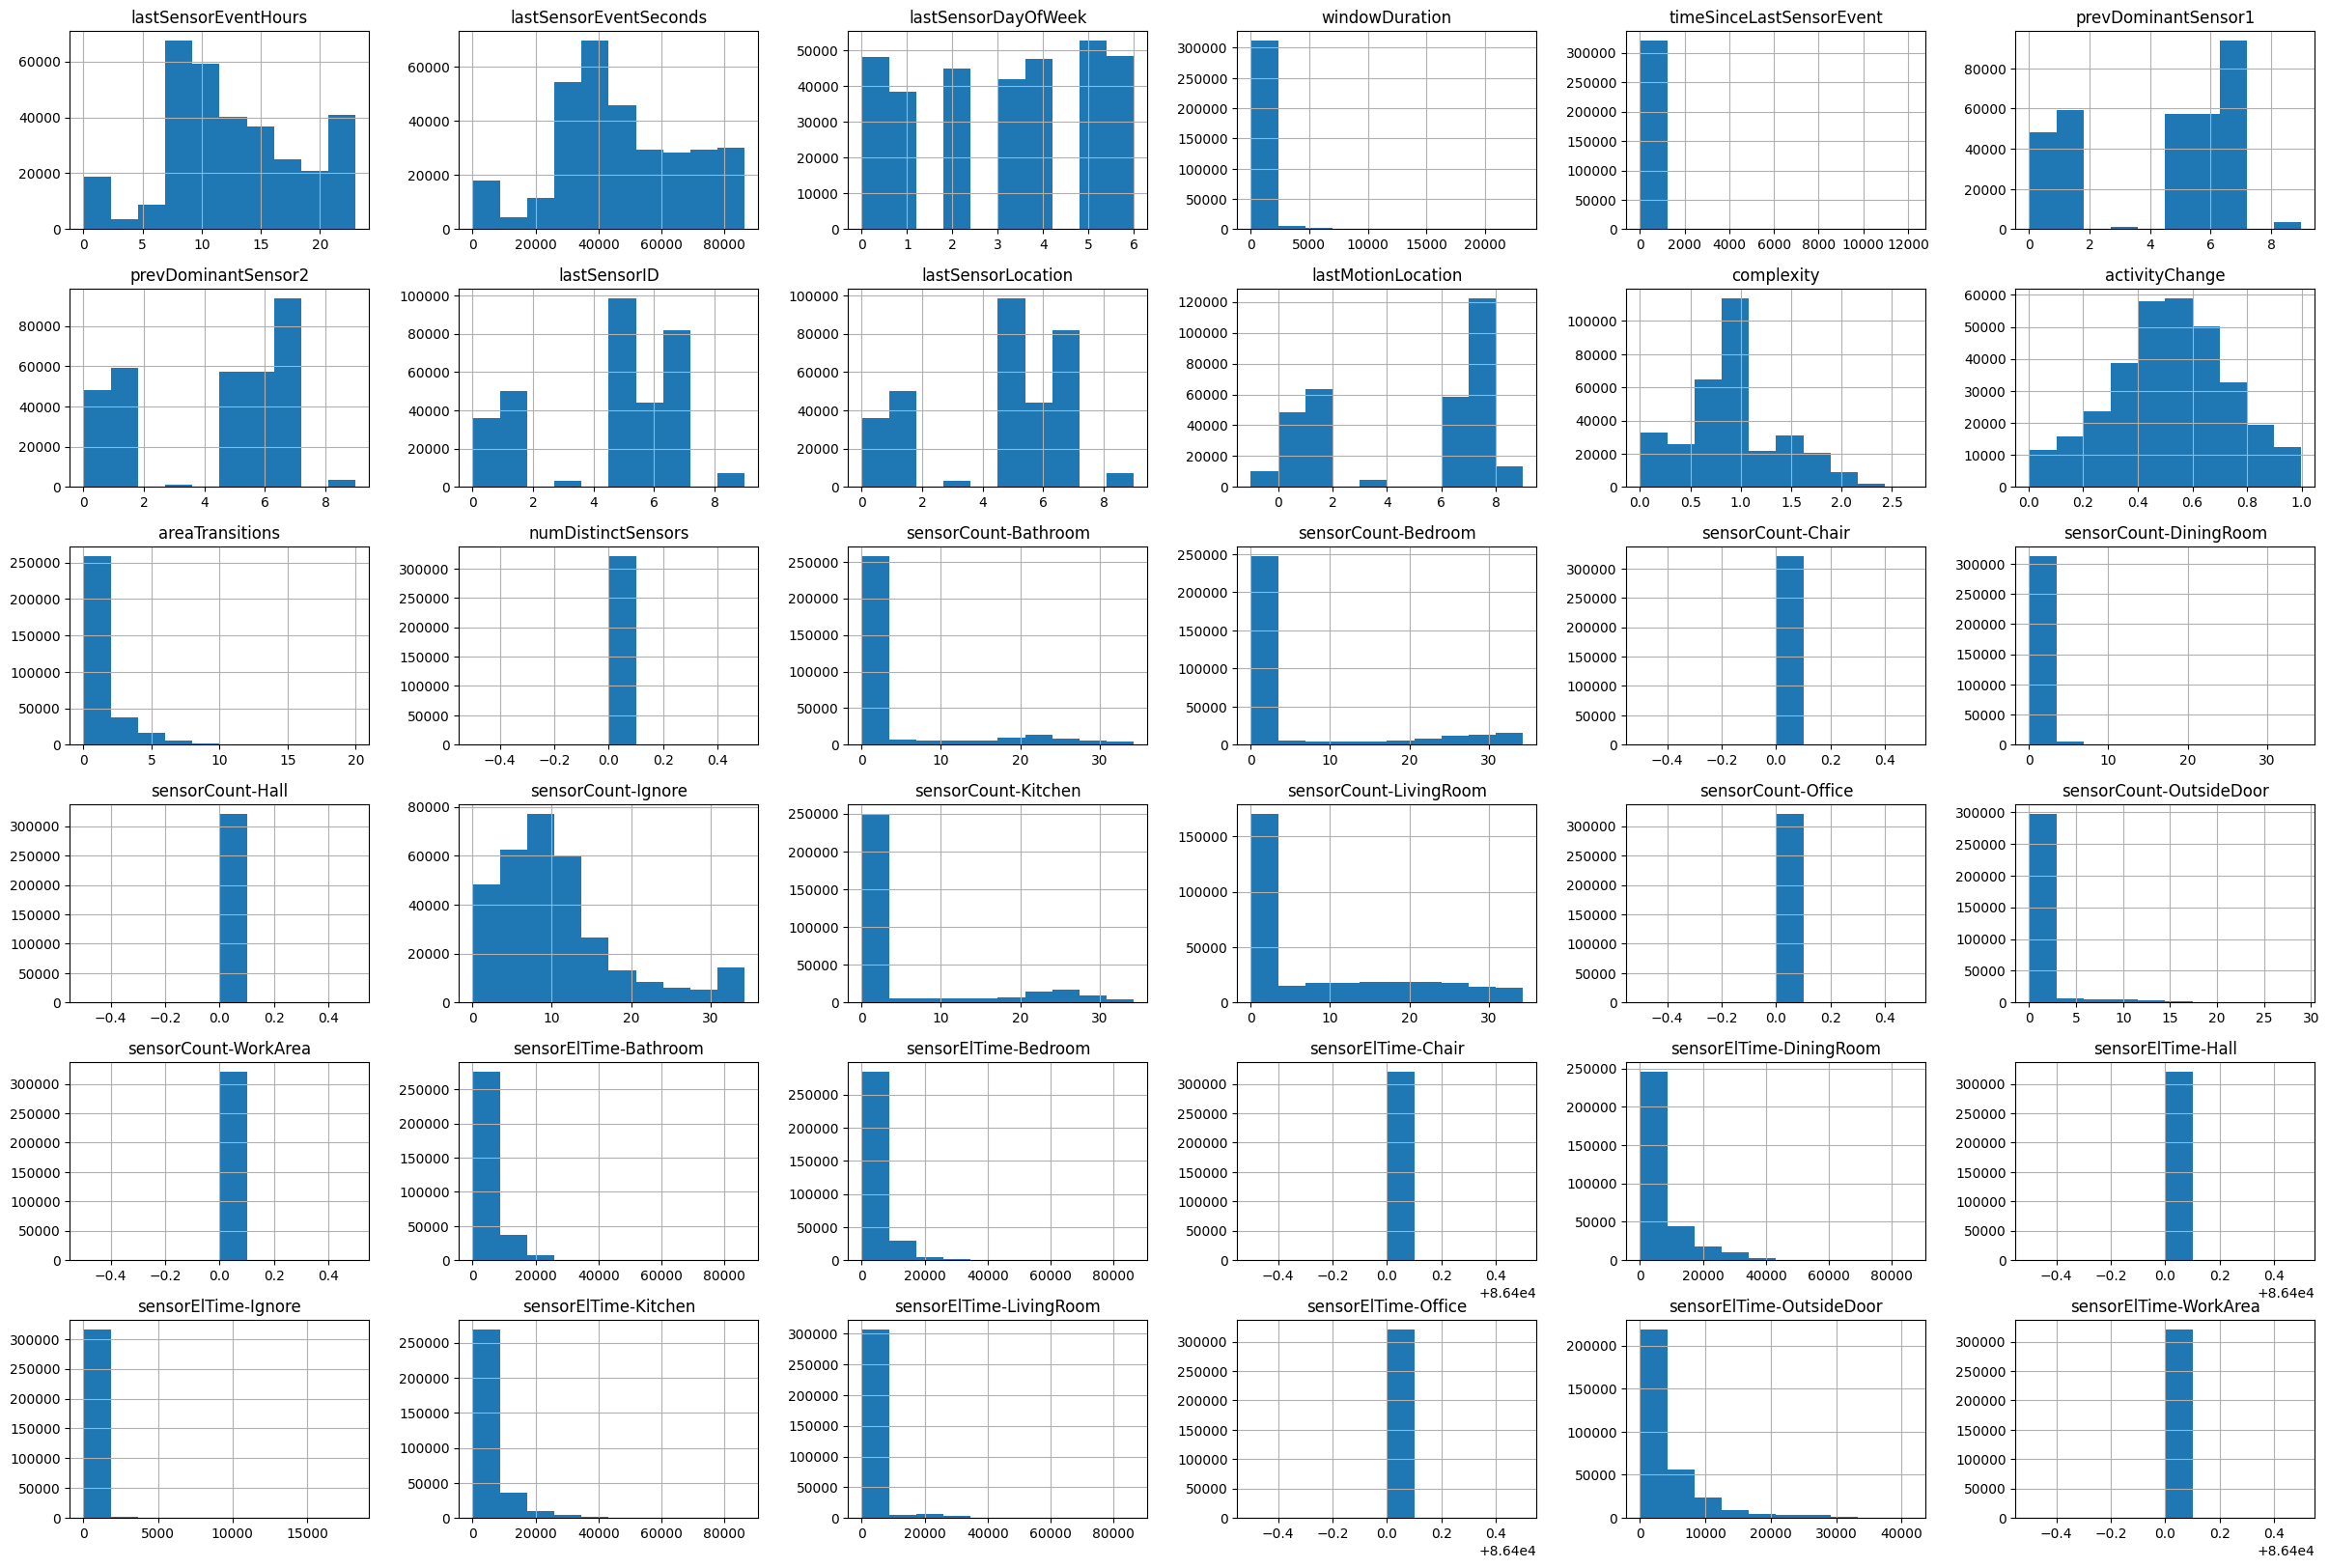

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(30, 20))
plt.show()


Подготовим ключевые значения (Q1, Q3, IQR) для поиска выбросов:

In [ ]:
import pandas as pd

df = pd.read_csv('csh101.ann.features.csv')

# Выбираем только числовые столбцы
numeric_df = df.select_dtypes(include=['number'])

# Вычисляем квартали для числовых столбцов
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выводим результаты
print("Первый квартиль (Q1):")
print(Q1)
print("Третий квартиль (Q3):")
print(Q3)
print("Интерквартильный размах (IQR):")
print(IQR)
print("Границы выбросов:")
print("Нижняя граница:", lower_bound)
print("Верхняя граница:", upper_bound)


Первый квартиль (Q1):
lastSensorEventHours            9.000000
lastSensorEventSeconds      33548.000000
lastSensorDayOfWeek             1.000000
windowDuration                 49.000000
timeSinceLastSensorEvent        1.000000
prevDominantSensor1             1.000000
prevDominantSensor2             1.000000
lastSensorID                    1.000000
lastSensorLocation              1.000000
lastMotionLocation              1.000000
complexity                      0.650022
activityChange                  0.380952
areaTransitions                 0.000000
numDistinctSensors              0.000000
sensorCount-Bathroom            0.000000
sensorCount-Bedroom             0.000000
sensorCount-Chair               0.000000
sensorCount-DiningRoom          0.000000
sensorCount-Hall                0.000000
sensorCount-Ignore              5.520000
sensorCount-Kitchen             0.000000
sensorCount-LivingRoom          0.000000
sensorCount-Office              0.000000
sensorCount-OutsideDoor         0.0

Проверим на выбросы:

In [ ]:
# Создаем маски для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Проверим на выбросы для каждого столбца
outliers = (numeric_df < lower_bound) | (numeric_df > upper_bound)

# Посмотрим, какие строки содержат выбросы
outliers_summary = outliers.sum()  # Количество выбросов по каждому столбцу
print(outliers_summary)


lastSensorEventHours            0
lastSensorEventSeconds          0
lastSensorDayOfWeek             0
windowDuration              35582
timeSinceLastSensorEvent    56757
prevDominantSensor1             0
prevDominantSensor2             0
lastSensorID                    0
lastSensorLocation              0
lastMotionLocation              0
complexity                   9755
activityChange                  0
areaTransitions             41398
numDistinctSensors              0
sensorCount-Bathroom        72635
sensorCount-Bedroom         69326
sensorCount-Chair               0
sensorCount-DiningRoom      32053
sensorCount-Hall                0
sensorCount-Ignore          24583
sensorCount-Kitchen         73465
sensorCount-LivingRoom          0
sensorCount-Office              0
sensorCount-OutsideDoor     43982
sensorCount-WorkArea            0
sensorElTime-Bathroom       16773
sensorElTime-Bedroom        17119
sensorElTime-Chair              0
sensorElTime-DiningRoom     25072
sensorElTime-H

Проверим, сбалансированы ли классы:

In [ ]:
# Подсчёт количества объектов в каждом классе (для столбца 'activity')
class_counts = df['activity'].value_counts()

print("Распределение классов:")
print(class_counts)


Распределение классов:
activity
Other_Activity           90824
Watch_TV                 61312
Sleep_Out_Of_Bed         16618
Bathe                    16289
Cook_Breakfast           16279
Dress                    14051
Toilet                   13727
Personal_Hygiene         13221
Sleep                    11752
Read                      8608
Relax                     5777
Cook_Dinner               5557
Drink                     3794
Eat_Breakfast             3564
Morning_Meds              3543
Evening_Meds              3359
Cook_Lunch                3197
Wash_Breakfast_Dishes     3197
Wash_Dishes               3194
Leave_Home                3124
Cook                      2764
Enter_Home                2594
Entertain_Guests          2568
Wash_Dinner_Dishes        2459
Phone                     1846
Groom                     1797
Step_Out                  1491
Eat_Dinner                1092
Eat_Lunch                  866
Wash_Lunch_Dishes          773
Bed_Toilet_Transition      720
Eat    